In [105]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [106]:
np.sum((np.array([5,3])-np.array([[2,4],[3,8]])),axis=1)

array([ 2, -3])

In [107]:
np.array([5,3])-np.array([[2,4],[3,8]])

array([[ 3, -1],
       [ 2, -5]])

In [108]:
def kmeans(n_clusters, dataset):
    # Initialize cluster centers randomly
    centers = dataset[np.random.choice(dataset.shape[0], n_clusters, replace=False), :]
    # Initialize cluster assignments
    clusters = np.zeros(dataset.shape[0])
    # Iterate until convergence
    while True:
        # Assign each data point to the closest cluster center
        for i in range(dataset.shape[0]):
            distances = np.sqrt(np.sum((dataset[i, :] - centers) ** 2, axis=1))
            clusters[i] = np.argmin(distances)
        # Update cluster centers to be the mean of their assigned data points
        new_centers = np.zeros((n_clusters, dataset.shape[1]))
        for j in range(n_clusters):
            new_centers[j, :] = np.mean(dataset[clusters == j, :], axis=0)
        # Check if the cluster centers have converged
        if np.allclose(centers, new_centers):
            break
        else:
            centers = new_centers
    return centers, clusters

In [109]:
image = cv2.imread("img2.jpg")

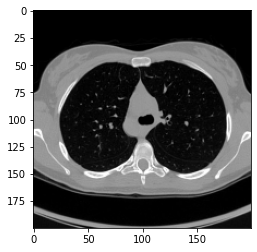

In [110]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(200,200))
plt.imshow(image)

In [111]:
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

In [112]:
centers, clusters = kmeans(n_clusters=2, dataset=pixel_vals)

In [113]:
centers

array([[150.07403564, 150.07403564, 150.07403564],
       [  8.05128384,   8.05128384,   8.05128384]])

In [114]:
centers = np.uint8(centers)

In [115]:
clusters = np.int32(clusters)
clusters

array([1, 1, 1, ..., 1, 1, 1])

In [116]:
segmented_data = centers[clusters]

In [117]:
segmented_data = segmented_data.reshape(image.shape)

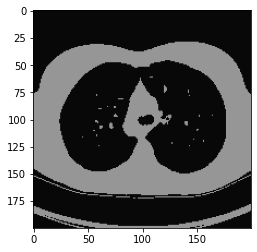

In [118]:
plt.imshow(segmented_data)